Descriptive Statistics:
                   Mean      Median  Standard Deviation  Skewness   Kurtosis
PassengerId  446.000000  446.000000          257.353842  0.000000  -1.200003
Survived       0.383838    0.000000            0.486592  0.477717  -1.771786
Pclass         2.308642    3.000000            0.836071 -0.629486  -1.279570
Age           29.699118   29.699118           13.002015  0.433756   0.954139
SibSp          0.523008    0.000000            1.102743  3.689128  17.773512
Parch          0.381594    0.000000            0.806057  2.744487   9.716613
Fare          32.204208   14.454200           49.693429  4.779253  33.204289


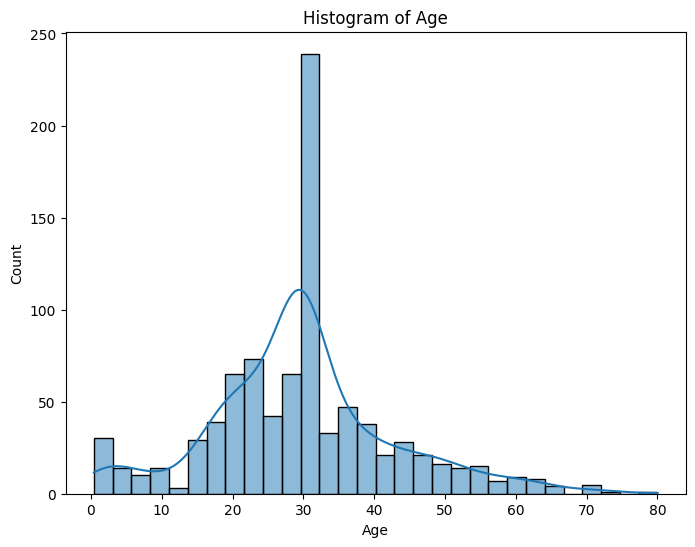

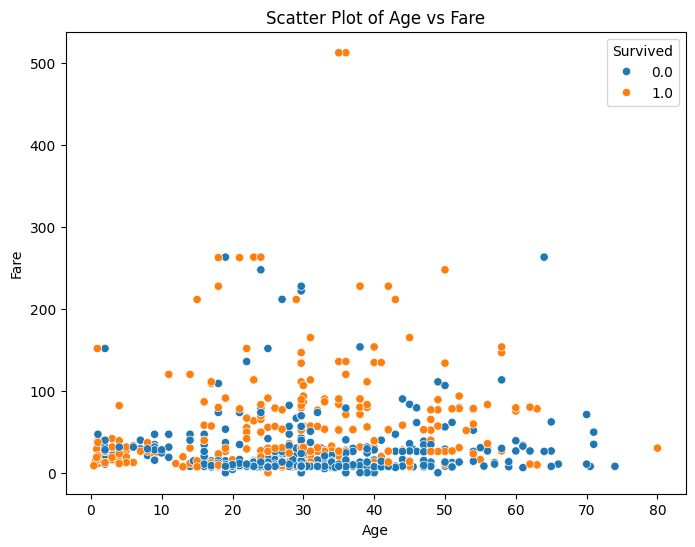

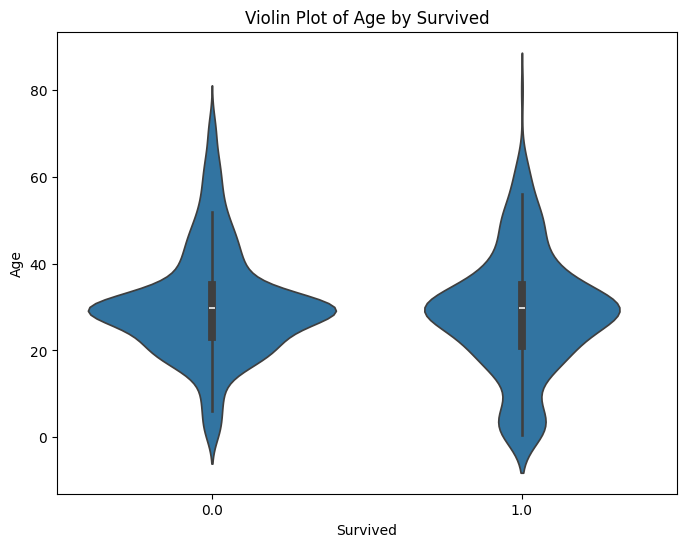

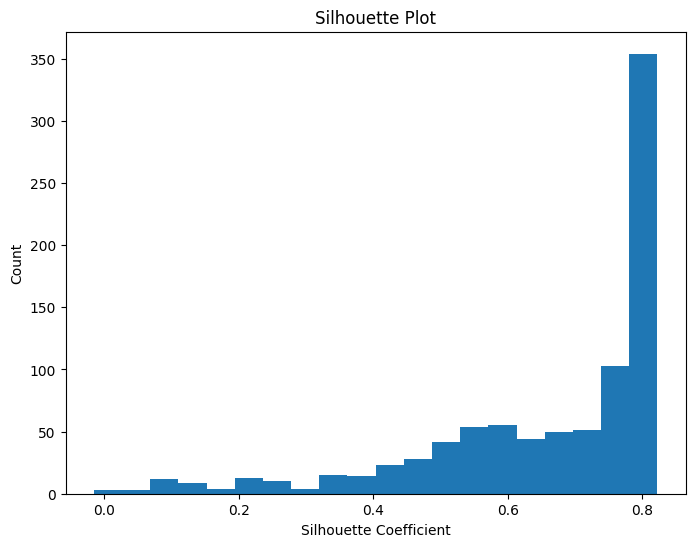

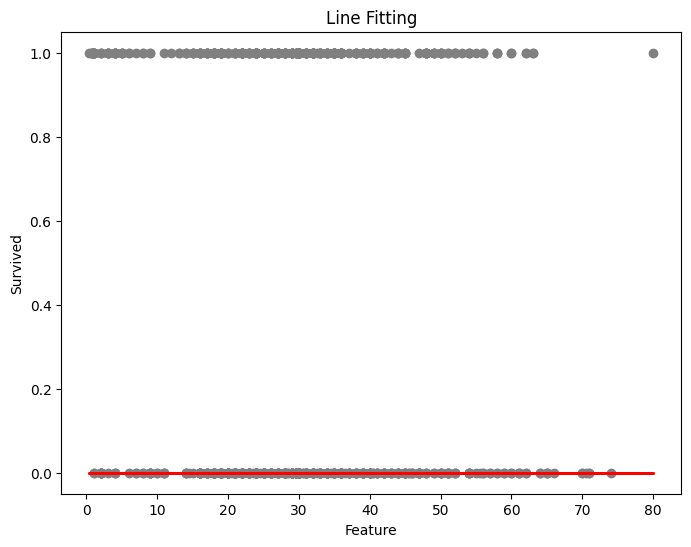

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from scipy.stats import skew, kurtosis

# Load the Titanic dataset
def load_dataset(url):
    return pd.read_csv(url)

# Function to calculate descriptive statistics
def calculate_descriptive_statistics(data):
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    skewness = data.apply(skew)
    kurtosis_val = data.apply(kurtosis)

    statistics = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis_val
    })

    return statistics

# Function to plot a histogram
def plot_histogram(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Function to plot a scatter plot
def plot_scatter(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue='Survived')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.legend(title='Survived', loc='upper right')
    plt.show()

# Function to plot a silhouette plot
def plot_silhouette(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_values = silhouette_samples(X, cluster_labels)

    plt.figure(figsize=(8, 6))
    plt.hist(silhouette_values, bins=20)
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Count')
    plt.show()

# Function to perform line fitting
def perform_line_fitting(X, y):
    model = LogisticRegression()
    model.fit(X, y)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='gray')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title('Line Fitting')
    plt.xlabel('Feature')
    plt.ylabel('Survived')
    plt.show()

# Function to plot a violin plot
def plot_violin(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Violin Plot of {y_column} by {x_column}')
    plt.show()

# Function to handle missing values
def handle_missing_values(data):
    imputer = SimpleImputer(strategy='mean')
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
    return data

# Main function
def main():
    # Load dataset
    # Replace 'titanic.csv' with the path to your Titanic dataset
    titanic_data = load_dataset('train.csv')

    # Handle missing values
    titanic_data = handle_missing_values(titanic_data)

    # Descriptive Statistics
    print("Descriptive Statistics:")
    print(calculate_descriptive_statistics(titanic_data.select_dtypes(include=[np.number])))

    # Plot 1: Histogram
    plot_histogram(titanic_data, 'Age')

    # Plot 2: Scatter Plot
    plot_scatter(titanic_data, 'Age', 'Fare')

    # Plot 3: Violin Plot
    plot_violin(titanic_data, 'Survived', 'Age')

    # Prepare data for silhouette plot
    X_silhouette = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

    # Plot 4: Silhouette Plot for K-means Clustering
    plot_silhouette(X_silhouette, n_clusters=3)

    # Plot 5: Line Fitting
    perform_line_fitting(titanic_data[['Age']], titanic_data['Survived'])

if __name__ == "__main__":
    main()
